### Topics covered:
- unique

- stat operations: mean, median, min, max, std_dev, var, percentile, describe, corrcoef, cov,

- isin, where
- set operations

**Other operations** (OPTIONAL)
- clip
- swapaxes
- delete
- put
- cut (TODO)

In [3]:
import numpy as np

# STATS 

## miscellaneous
- isin
- where
- set operations

In [32]:
# isin(): inbuilt method. Checks whether each element in the input array is present in a list of values.
# It does Membership Testing

# Imagine you run a small store and have a list of all available product IDs,
# and another list of product IDs purchased by a customer. You want to identify
# which of your products this customer actually bought.

# All available products in your store (product IDs)
available_products = np.array([101, 102, 103, 104, 105])

# Products purchased by a customer
purchased_products = np.array([102, 104, 106])  # 106 is not in your current inventory

# Check which available products were purchased
matching = np.isin(available_products, purchased_products)

# Get the actual product IDs that were both available and purchased
matched_products = available_products[matching]
print("Matched Product IDs:")
print(matched_products)  # [102 104]


# This operation helps in:
# 1. Inventory tracking (what's in stock and was sold)
# 2. Customer analytics (what’s commonly bought)
# 3. Fraud detection (purchases of unavailable items)

Matched Product IDs:
[102 104]


### where()
The np.where() function in NumPy allows you to find the indices of elements in an array that satisfy acertain condition. It can also be used to create new arrays based on conditions

Returns indices (or applies logic) where a condition is True.

You can also use: 

np.where(condition, x, y)  → Returns x if condition is True, else y.

In [33]:
# where()

# Application1: Assigning Letter Grades Based on Scores
scores = np.array([78, 45, 62, 33, 90, 50]) # Student scores
results = np.where(scores >= 50, "Pass", "Fail") # Use np.where to assign "Pass" or "Fail"

print("Scores:", scores)
print("Results:", results)

print("*****************************")
# Application2: Daily temperatures (°C) recorded over a week
temperatures = np.array([28, 33, 31, 25, 29, 35, 30])

temp_classification = np.where(temperatures > 30, 'Greater than 30', '30 or less')

print("Temperature readings:", temperatures)
print("Classification:", temp_classification)
print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")

# Create a 2D NumPy array
# Temperatures (°C) recorded hourly in 3 rooms over 4 hours
temps = np.array([
    # Room1, Room2, Room3
    [22, 26, 24],  # Hour 1
    [23, 27, 26],  # Hour 2
    [25, 28, 23],  # Hour 3
    [21, 24, 27]   # Hour 4
])

# Flag temperatures above 25°C as "Alert", else "Normal"
status = np.where(temps > 25, "Alert", "Normal")

print("Temperature readings:\n", temps)
print("\nStatus:\n", status)


Scores: [78 45 62 33 90 50]
Results: ['Pass' 'Fail' 'Pass' 'Fail' 'Pass' 'Pass']
*****************************
Temperature readings: [28 33 31 25 29 35 30]
Classification: ['30 or less' 'Greater than 30' 'Greater than 30' '30 or less'
 '30 or less' 'Greater than 30' '30 or less']
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Temperature readings:
 [[22 26 24]
 [23 27 26]
 [25 28 23]
 [21 24 27]]

Status:
 [['Normal' 'Alert' 'Normal']
 ['Normal' 'Alert' 'Alert']
 ['Normal' 'Alert' 'Normal']
 ['Normal' 'Normal' 'Alert']]


In [34]:
# SKIP set operations

a = np.array([1, 2, 3, 4])
b = np.array([3, 4, 5, 6])

print(np.intersect1d(a, b))  # Output: [3 4]  Elements common to both arrays
print(np.setdiff1d(a, b))  # Output: [1 2]  Elements in a that are not in b
print(np.union1d(a, b))  # Output: [1 2 3 4 5 6] All unique elements from both arrays

# and there are many others

[3 4]
[1 2]
[1 2 3 4 5 6]


## other operations:

### clip
np.clip(random_normal, x1, x2)
This function clips the values in the array. That means:
- Any value less than x1 is set to x1
- Any value greater than x2 is set to x2
- Values between x1 and x2 stay the same
- It's commonly used in image processing, sensor data normalization, or finance to avoid extreme values.

This is useful to keep your data within a specific range (like valid scores, age limits, or any bounded system).


In [35]:
# example 1 of clip: 
# A sensor should return values between 20-150
import numpy as np

# Hard-coded values (can be from any distribution or just manually set)
readings_sensor = np.array([
    14, 15,                                # this 2 would get clipped to 20 
    25, 30, 40, 45, 65, 85,  # these values remain same
    155, 160, 175                    # these 3 would get clipped to 150
])
print(f"sensor readigs: {readings_sensor}")

# Step 3: Clip the values between 20 and 150
safe_readings  = np.clip(readings_sensor, 20, 150)
print(f"safe_readings:  {safe_readings }") # NOTE:Values 10 and 15 would get clipped to 20. Values 155, 160, 175, 200 would clipped to 150 

sensor readigs: [ 14  15  25  30  40  45  65  85 155 160 175]
safe_readings:  [ 20  20  25  30  40  45  65  85 150 150 150]


numbers (Before clip): [ 19.5063724   34.37143533  35.31077713  36.0082469   37.03071962
  37.16799388  38.31837019  40.92399612  41.87705419  44.68210322
  44.81291914  46.23341422  47.12881938  48.03695024  48.4121263
  49.38129534  49.61573145  49.69240747  49.95372343  50.5582658
  51.79534878  51.98858467  53.85653053  54.07623223  54.22839209
  54.47890875  54.99258982  55.0948344   55.21741257  55.78304906
  56.22516056  56.42574255  57.34162565  58.05638055  58.22768755
  58.44240716  58.55722678  59.67922199  60.23659187  60.63295824
  61.554374    62.01439414  62.26531363  62.29939811  62.76213926
  62.90356409  63.57106109  63.83015705  64.01956192  64.48294204
  64.60474288  64.78765993  64.94306827  65.18698154  65.41866769
  65.67936964  66.15659589  66.74083421  67.00389479  67.11740727
  67.14121455  67.44867265  67.99938196  68.07694999  68.45533838
  68.66676919  68.70999131  68.87200613  69.95733469  69.98403275
  70.84255676  70.94281177  71.39043189  71.75599491  7

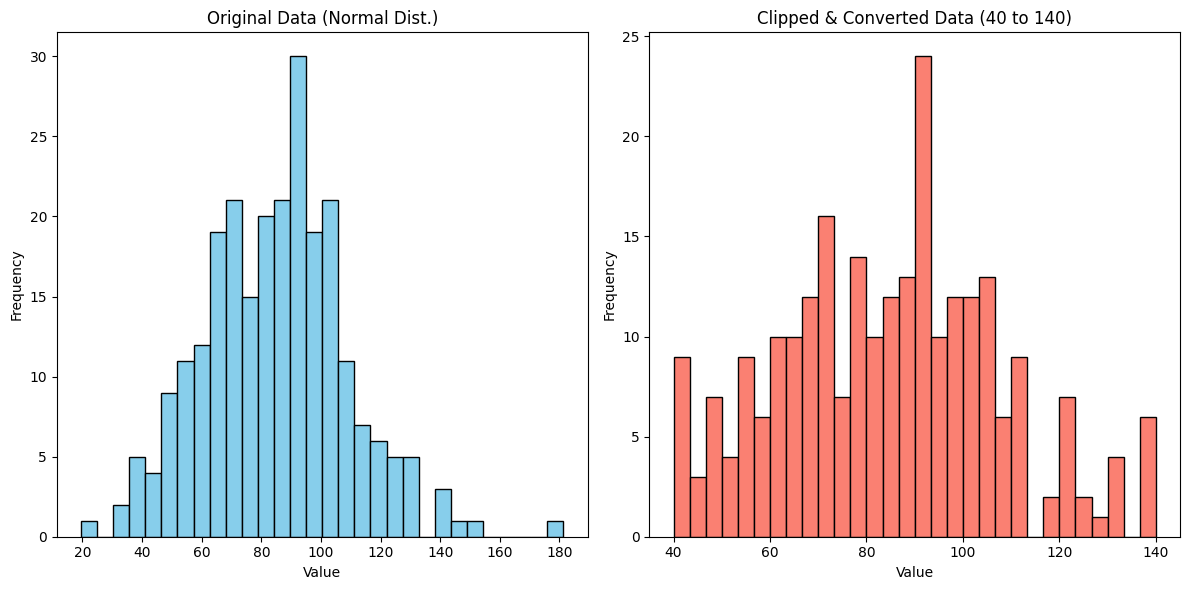

In [36]:
# Example 2 of clip
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate normally distributed data
np.random.seed(42)  # for reproducibility
random_normal = np.random.normal(loc=85, scale=25, size=250)
random_normal = np.sort(random_normal)
print(f"numbers (Before clip): {random_normal}")

# Step 2: Clip the data between 40 and 140, then convert to int
clipped_data = np.clip(random_normal, 40, 140).astype(int)
clipped_data = np.sort(clipped_data)
print(f"numbers (After clip): {clipped_data}")


#####OPTIONAL#################
# Step 3: Plot before and after clipping
plt.figure(figsize=(12, 6))

# Original data
plt.subplot(1, 2, 1)
plt.hist(random_normal, bins=30, color='skyblue', edgecolor='black')
plt.title('Original Data (Normal Dist.)')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Clipped data
plt.subplot(1, 2, 2)
plt.hist(clipped_data, bins=30, color='salmon', edgecolor='black')
plt.title('Clipped & Converted Data (40 to 140)')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### observation
Left histogram (original): Shows a typical bell curve, with some values possibly below 40 or above 140.

Right histogram (clipped): Shows how all values are forced into the 40–140 range, with sharp spikes at 40 and 140 (from clipped values).